In [ ]:
!pip install autograd


In [ ]:
from autograd import grad 
import autograd.numpy as np
import numpy

def rosenbrock(x):
    z = (1-x[0])**2 + 100*((x[1]-x[0]**2)**2)
    return z
# testing how to calculate the gradient!
gradient = grad(rosenbrock)
# it works!
gradient(np.array([3., 5.]))

# now doing regular gradient descent
w = np.array([2., 3.])
gamma = 10e-4
epochs = 1000
trace_x = np.zeros(1 + epochs)
trace_y = np.zeros(1 + epochs)
trace_z = np.zeros(1 + epochs)
trace_x[0] = w[0]
trace_y[0] = w[1]
trace_z[0] = rosenbrock(w)

for e in range(epochs):
  grad_eval = gradient(w)
  w = w - gamma*grad_eval
  trace_x[e+1] = w[0]
  trace_y[e+1] = w[1]
  trace_z[e+1] = rosenbrock(w)
  #print(w)
print(trace_z)

[1.01000000e+02 3.11489696e+02 1.77449669e+02 ... 1.49250394e-01
 1.49181734e-01 1.49113098e-01]


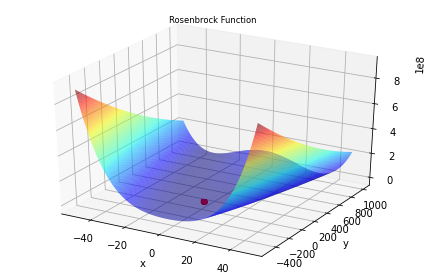

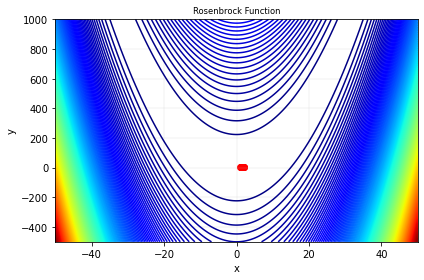

In [ ]:
# plotting the trace
import numpy as nmp
import matplotlib.pyplot as plt

# plotting Rosenbrock funtion
x, y = nmp.meshgrid(nmp.linspace(-50, 50, 200),nmp.linspace(-500, 1000, 200))
z = (1-x)**2 + 100*((y-x**2)**2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap = 'jet', alpha=0.7)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Function", fontsize='small')
plt.grid(color='silver', linestyle='-', linewidth=0.2)
ax.scatter(trace_x, trace_y, trace_z, marker='o', color='red')
plt.tight_layout()
plt.show()

# plot the contour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, 200, cmap = 'jet')
ax.scatter(trace_x, trace_y, marker='o', color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Function", fontsize='small')
plt.grid(color='silver', linestyle='-', linewidth=0.2)
plt.tight_layout()
plt.show()

In [ ]:
# now doing gradient descent with momentum
beta = 0.9
#w = np.array([2., 3.])
w = np.array([-2., 0.])
v=0
trace_x = np.zeros(1 + epochs)
trace_y = np.zeros(1 + epochs)
trace_z = np.zeros(1 + epochs)
trace_x[0] = w[0]
trace_y[0] = w[1]
trace_z[0] = rosenbrock(w)
gamma = 10e-3
for i in range(epochs):
  v = beta*v + (1-beta)*gradient(w)
  vc = v/(1+beta**(i+1))
  w = w - gamma * vc
  trace_x[i+1] = w[0]
  trace_y[i+1] = w[1]
  trace_z[i+1] = rosenbrock(w)
  #print(w)
print(trace_z)
print(trace_x)
print(trace_y)

[1.60900000e+03 1.21762042e+01 6.50407828e+01 ... 2.98739004e-05
 2.96242040e-05 2.93766043e-05]
[-2.         -0.31263158  1.26062476 ...  0.9945387   0.99456157
  0.99458434]
[0.         0.42105263 0.78311737 ... 0.98908529 0.98913088 0.98917627]


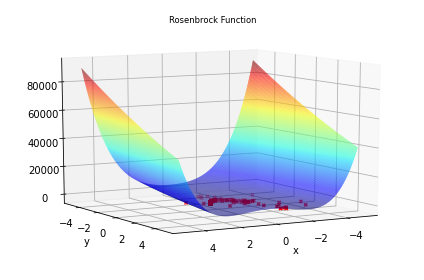

<function matplotlib.pyplot.show>

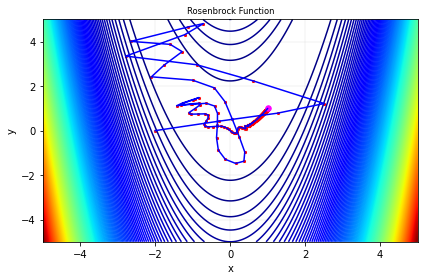

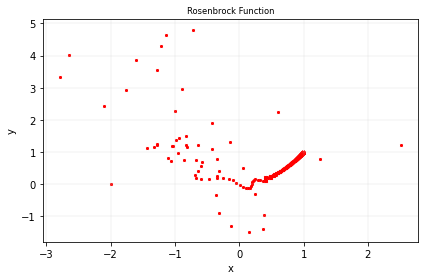

In [ ]:
# plotting the trace
import numpy as nmp
import matplotlib.pyplot as plt

# plotting Rosenbrock funtion
x, y = nmp.meshgrid(nmp.linspace(-5, 5, 200),nmp.linspace(-5, 5, 200))
z = (1-x)**2 + 100*((y-x**2)**2)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap = 'jet', alpha=0.7)
ax.view_init(elev=10, azim=60)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Function", fontsize='small')
#plt.grid(color='silver', linestyle='-', linewidth=0.2)
ax.scatter(trace_x, trace_y, trace_z, marker='x', color='red', s=10)
plt.tight_layout()
plt.show()

# plot the contour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.contour(x, y, z, 200, cmap = 'jet')
ax.plot(trace_x, trace_y, color='blue')
ax.scatter(trace_x, trace_y, marker='x', color='red', s=5)
ax.scatter(1, 1, marker='o', color='magenta', s=30)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Function", fontsize='small')
plt.grid(color='silver', linestyle='-', linewidth=0.2)
plt.tight_layout()
plt.show

# plot the contour
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(trace_x, trace_y, marker='x', color='red', s=5)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Rosenbrock Function", fontsize='small')
plt.grid(color='silver', linestyle='-', linewidth=0.2)
plt.tight_layout()
plt.show